# Customer Churn EDA - Thai Telecom Dataset
This notebook performs exploratory data analysis on the Thai customer churn dataset.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
%matplotlib inline

In [2]:
# Install required packages if not available
import sys
try:
    import sklearn
    print(f"✓ sklearn version {sklearn.__version__} is already installed")
except ImportError:
    print("Installing scikit-learn...")
    !{sys.executable} -m pip install scikit-learn -q
    print("✓ scikit-learn installed successfully")

✓ sklearn version 1.7.2 is already installed


## 1. Load Dataset

In [3]:
# Load the dataset
df = pd.read_csv('../dataset/thai_customer_churn_dataset.csv')
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (100000, 54)


,customer_id,full_name_thai,gender,age,senior_citizen,partner,dependents,province,postcode,region,...,nps_score,support_channel_preference,num_plan_changes,plan_downgrade_6months,plan_upgrade_6months,days_to_contract_end,churned,churn_date,churn_reason,competitor_switched_to
0,TH0000000,Kritsada Pongpanit,Male,22,0,Yes,3,Pathum Thani,12125,Central,...,-6,Phone,4,No,Yes,0,0,NaN,NaN,NaN
1,TH0000001,Boonmee Sombatpiboon,Male,54,0,Yes,0,Saraburi,18328,Central,...,42,Phone,3,No,No,0,0,NaN,NaN,NaN
2,TH0000002,Kanokwan Pongpanit,Female,38,0,Yes,0,Rayong,21792,East,...,27,Line Chat,3,No,No,0,0,NaN,NaN,NaN
3,TH0000003,Suchada Srisawat,Female,49,0,No,1,Surin,32704,Northeast,...,-12,Email,3,Yes,No,0,0,NaN,NaN,NaN
4,TH0000004,Sukanya Saetang,Female,44,0,Yes,1,Udon Thani,41195,Northeast,...,83,Line Chat,0,Yes,No,200,0,NaN,NaN,NaN


- note that there are churned, churn_date, churn_reason and comperitors_swithced_to columns, these columns can be used to create another report --> topic reason the switch service. 

## 2. Basic Data Information

In [4]:
# Display basic information
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   customer_id                  100000 non-null  object 
 1   full_name_thai               100000 non-null  object 
 2   gender                       100000 non-null  object 
 3   age                          100000 non-null  int64  
 4   senior_citizen               100000 non-null  int64  
 5   partner                      100000 non-null  object 
 6   dependents                   100000 non-null  int64  
 7   province                     100000 non-null  object 
 8   postcode                     100000 non-null  int64  
 9   region                       100000 non-null  object 
 10  account_created_date         100000 non-null  object 
 11  tenure_months                100000 non-null  int64  
 12  contract_type                100000 non-null 

In [5]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing_values,
    'Missing_Percent': missing_percent
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
print("\nMissing Values:")
print(missing_df)


Missing Values:
                        Missing_Count  Missing_Percent
competitor_switched_to          91933           91.933
churn_date                      68631           68.631
churn_reason                    68631           68.631
internet_service                12973           12.973


In [6]:
# Display statistical summary
print("\nNumerical Features Summary:")
df.describe()


Numerical Features Summary:


,age,senior_citizen,dependents,postcode,tenure_months,multiple_lines,monthly_charges_thb,total_charges_thb,price_increase_6months_thb,discount_amount_thb,...,roaming_charges_thb,num_support_tickets,num_support_tickets_6months,avg_ticket_resolution_hours,num_complaints,customer_satisfaction_score,nps_score,num_plan_changes,days_to_contract_end,churned
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000
mean,38.051610,0.059140,1.450620,43310.537280,28.426480,0.898500,988.985500,28143.988760,32.314000,86.567000,...,45.246935,1.996990,0.847110,24.110934,0.299840,4.273446,24.360950,1.501040,69.00175,0.313690
std,13.018846,0.235888,1.162056,26488.909933,16.703017,0.886141,433.892734,21913.492602,61.222487,142.056701,...,134.828723,1.413556,0.847716,17.094565,0.545086,0.445495,34.260436,1.226032,152.55526,0.463994
min,18.000000,0.000000,0.000000,10100.000000,0.000000,0.000000,199.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.020000,0.000000,1.910000,-100.000000,0.000000,0.00000,0.000000
25%,28.000000,0.000000,0.000000,18828.750000,14.000000,0.000000,649.000000,10937.345000,0.000000,0.000000,...,0.000000,1.000000,0.000000,11.500000,0.000000,4.010000,1.000000,1.000000,0.00000,0.000000
50%,38.000000,0.000000,1.000000,40571.500000,28.000000,1.000000,949.000000,23393.420000,0.000000,0.000000,...,0.000000,2.000000,1.000000,20.170000,0.000000,4.350000,24.000000,1.000000,0.00000,0.000000
75%,47.000000,0.000000,2.000000,65460.250000,43.000000,1.000000,1248.000000,40558.600000,50.000000,150.000000,...,0.000000,3.000000,1.000000,32.580000,1.000000,4.620000,48.000000,2.000000,5.00000,1.000000
max,75.000000,1.000000,4.000000,96997.000000,57.000000,3.000000,2797.000000,149592.720000,300.000000,500.000000,...,1966.720000,11.000000,6.000000,203.780000,5.000000,5.000000,100.000000,9.000000,730.00000,1.000000


## 3. Target Variable Analysis - Churn Rate

Churn Distribution:
churned
0    68631
1    31369
Name: count, dtype: int64

Churn Rate: 31.37%


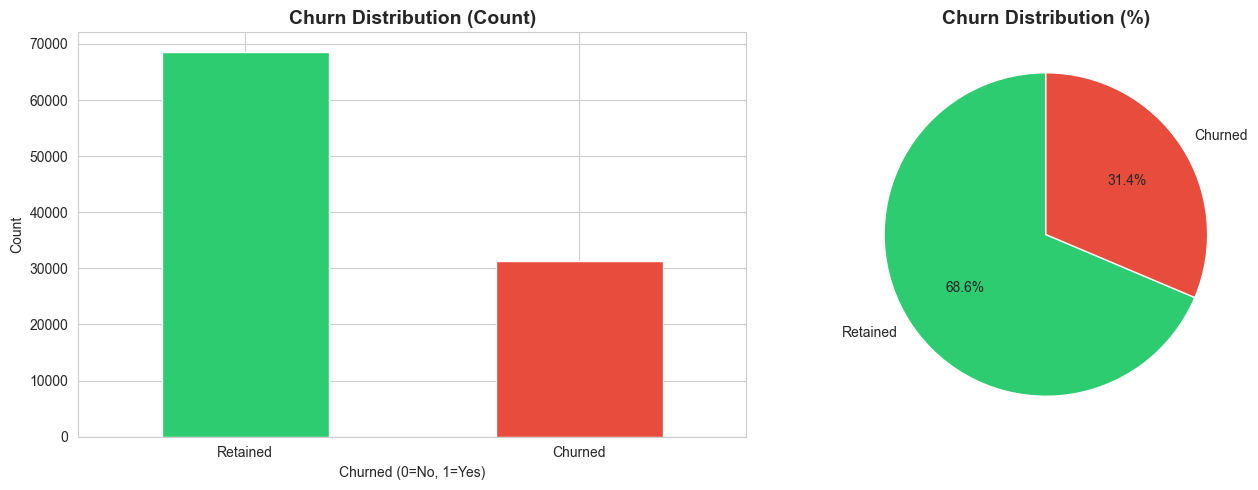

In [7]:
# Analyze churn distribution
churn_counts = df['churned'].value_counts()
churn_rate = (churn_counts[1] / len(df)) * 100 if 1 in churn_counts else 0

print(f"Churn Distribution:")
print(churn_counts)
print(f"\nChurn Rate: {churn_rate:.2f}%")

# Visualize churn distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
churn_counts.plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Churn Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Churned (0=No, 1=Yes)')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['Retained', 'Churned'], rotation=0)

# Pie chart
axes[1].pie(churn_counts, labels=['Retained', 'Churned'], autopct='%1.1f%%',
            colors=['#2ecc71', '#e74c3c'], startangle=90)
axes[1].set_title('Churn Distribution (%)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


Top Churn Reasons:
churn_reason
Price Too High         9566
Poor Signal Quality    6256
Competitor Offer       5550
Poor Service           3083
Relocated              2521
Better Promotion       2517
No Longer Need         1286
Other                   590
Name: count, dtype: int64


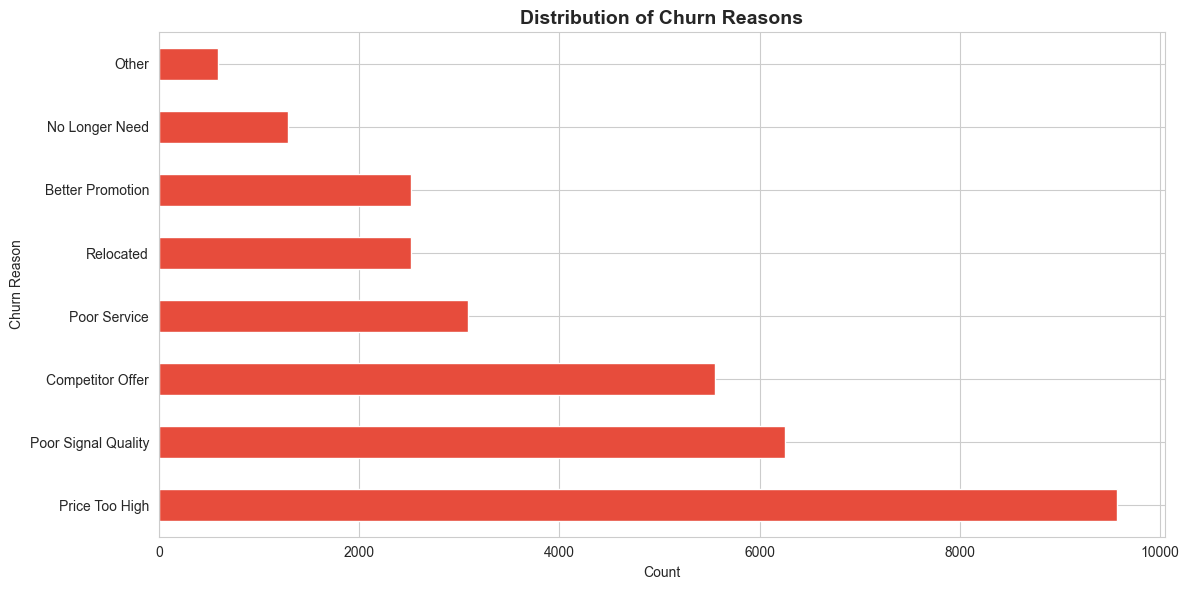

In [8]:
# Analyze churn reasons
if 'churn_reason' in df.columns:
    churn_reasons = df[df['churned'] == 1]['churn_reason'].value_counts()
    print("\nTop Churn Reasons:")
    print(churn_reasons)
    
    # Visualize churn reasons
    plt.figure(figsize=(12, 6))
    churn_reasons.plot(kind='barh', color='#e74c3c')
    plt.title('Distribution of Churn Reasons', fontsize=14, fontweight='bold')
    plt.xlabel('Count')
    plt.ylabel('Churn Reason')
    plt.tight_layout()
    plt.show()

## 4. Demographic Analysis

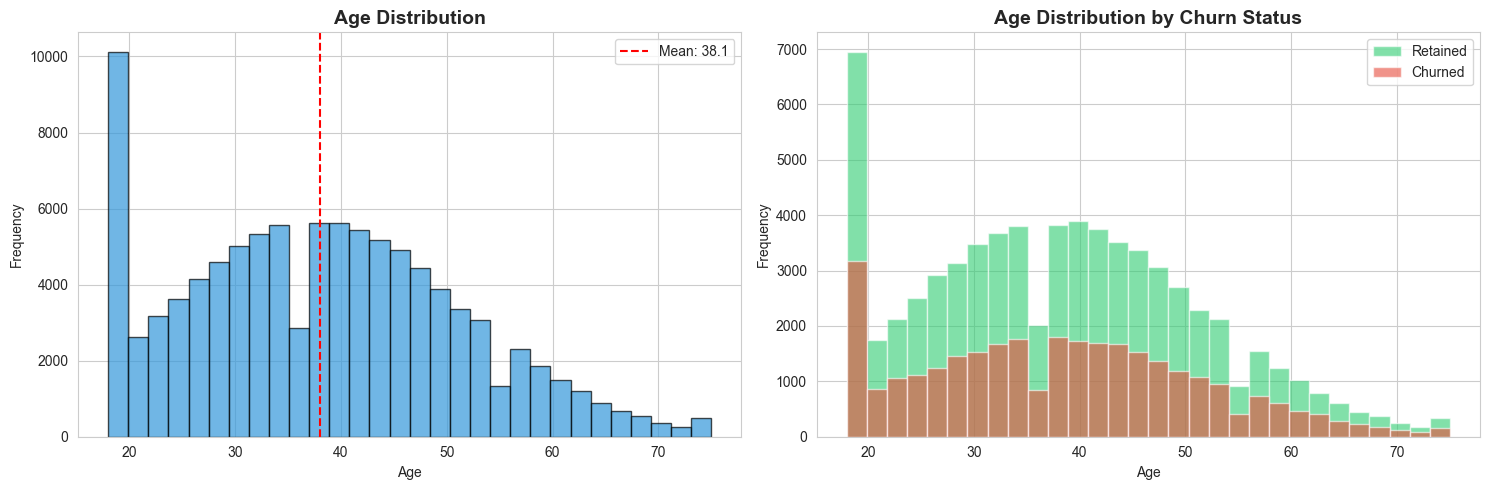

Age Statistics:
count    100000.000000
mean         38.051610
std          13.018846
min          18.000000
25%          28.000000
50%          38.000000
75%          47.000000
max          75.000000
Name: age, dtype: float64


In [9]:
# Age distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Overall age distribution
axes[0].hist(df['age'], bins=30, color='#3498db', edgecolor='black', alpha=0.7)
axes[0].set_title('Age Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
axes[0].axvline(df['age'].mean(), color='red', linestyle='--', label=f"Mean: {df['age'].mean():.1f}")
axes[0].legend()

# Age distribution by churn
df[df['churned']==0]['age'].hist(bins=30, ax=axes[1], alpha=0.6, label='Retained', color='#2ecc71')
df[df['churned']==1]['age'].hist(bins=30, ax=axes[1], alpha=0.6, label='Churned', color='#e74c3c')
axes[1].set_title('Age Distribution by Churn Status', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')
axes[1].legend()

plt.tight_layout()
plt.show()

print(f"Age Statistics:")
print(df['age'].describe())

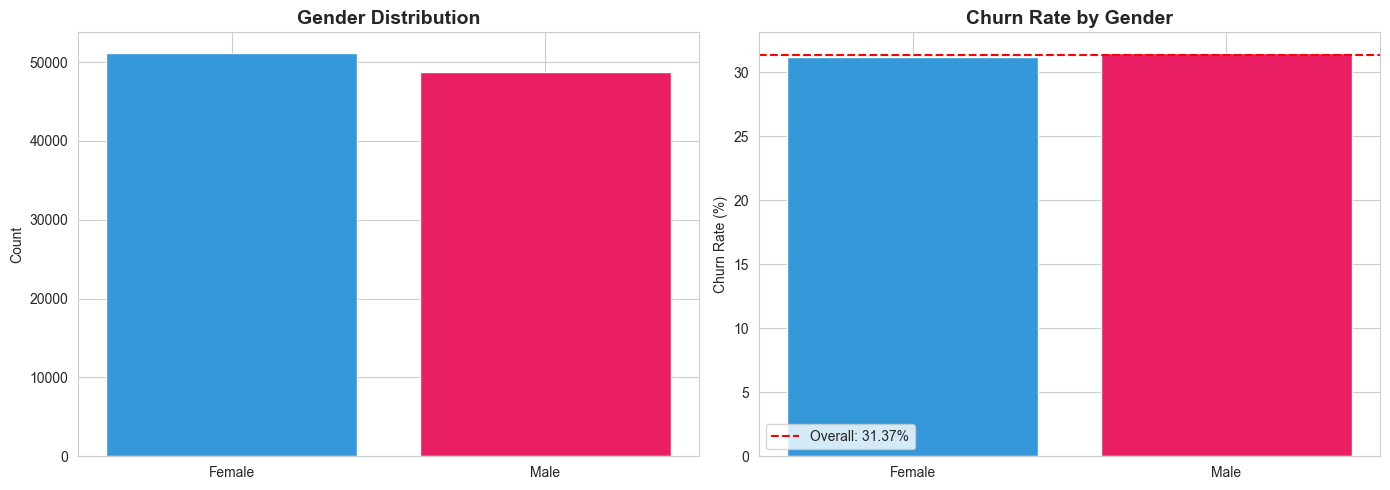


Gender Churn Rates:
gender
Female    31.202171
Male      31.544202
Name: churned, dtype: float64


In [10]:
# Gender analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gender distribution
gender_counts = df['gender'].value_counts()
axes[0].bar(gender_counts.index, gender_counts.values, color=['#3498db', '#e91e63'])
axes[0].set_title('Gender Distribution', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count')

# Churn rate by gender
gender_churn = df.groupby('gender')['churned'].mean() * 100
axes[1].bar(gender_churn.index, gender_churn.values, color=['#3498db', '#e91e63'])
axes[1].set_title('Churn Rate by Gender', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Churn Rate (%)')
axes[1].axhline(churn_rate, color='red', linestyle='--', label=f"Overall: {churn_rate:.2f}%")
axes[1].legend()

plt.tight_layout()
plt.show()

print("\nGender Churn Rates:")
print(gender_churn)

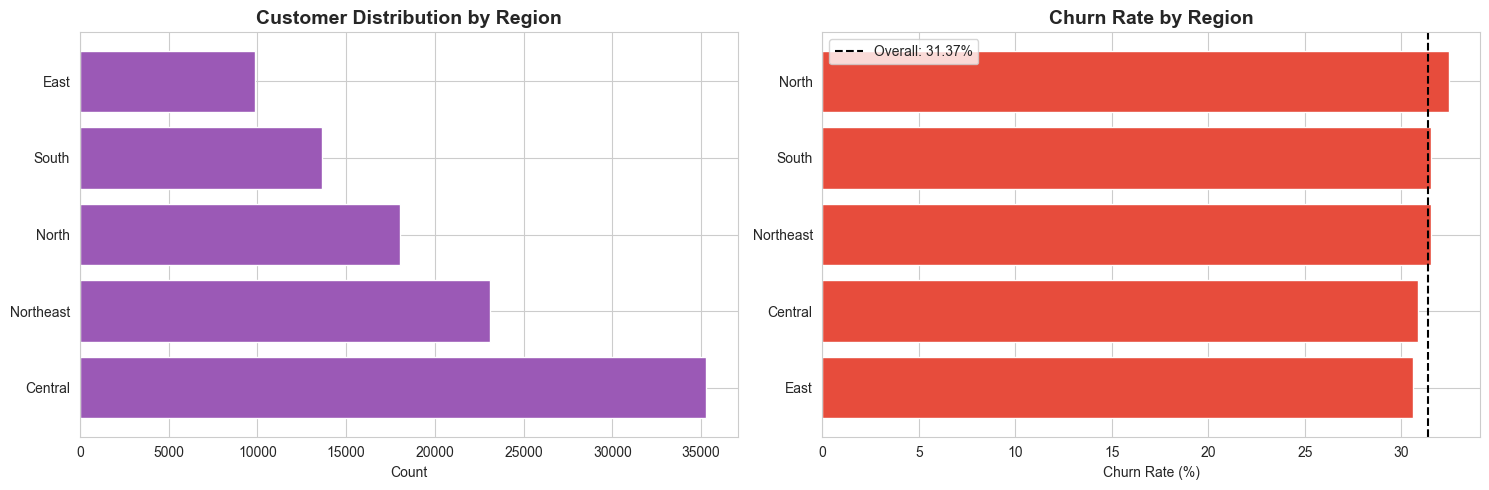


Region Churn Rates:
region
North        32.454586
South        31.537335
Northeast    31.523196
Central      30.859685
East         30.609348
Name: churned, dtype: float64


In [11]:
# Geographic analysis - Region
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Region distribution
region_counts = df['region'].value_counts()
axes[0].barh(region_counts.index, region_counts.values, color='#9b59b6')
axes[0].set_title('Customer Distribution by Region', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Count')

# Churn rate by region
region_churn = df.groupby('region')['churned'].mean() * 100
region_churn = region_churn.sort_values(ascending=True)
axes[1].barh(region_churn.index, region_churn.values, color='#e74c3c')
axes[1].set_title('Churn Rate by Region', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Churn Rate (%)')
axes[1].axvline(churn_rate, color='black', linestyle='--', label=f"Overall: {churn_rate:.2f}%")
axes[1].legend()

plt.tight_layout()
plt.show()

print("\nRegion Churn Rates:")
print(region_churn.sort_values(ascending=False))

## 5. Contract & Service Analysis

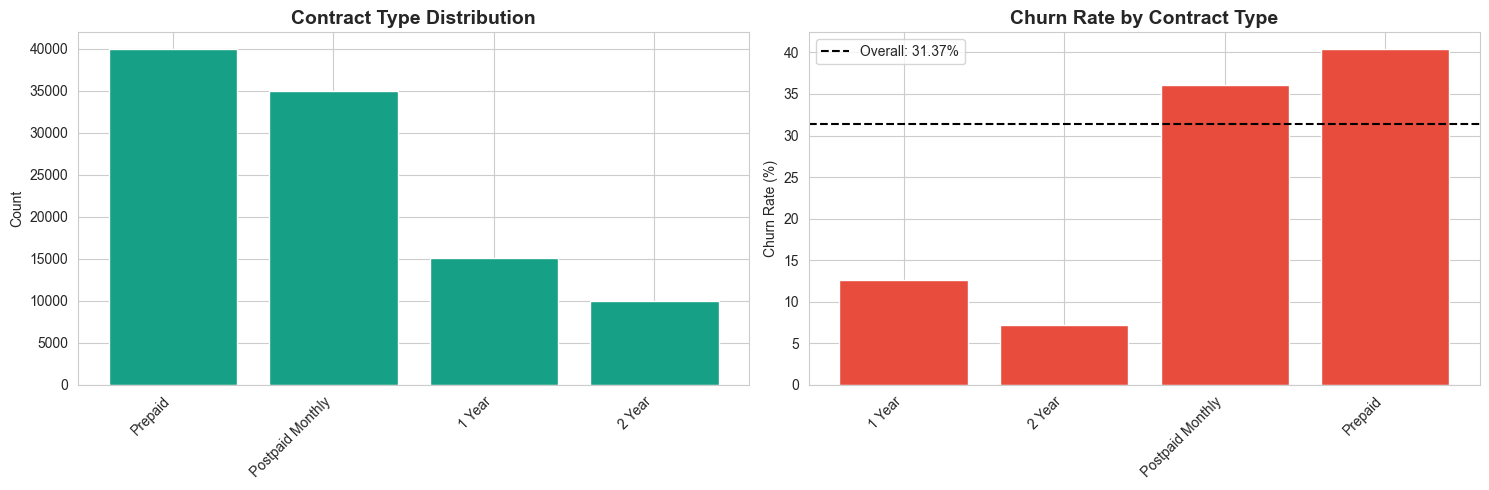


Contract Type Churn Rates:
contract_type
Prepaid             40.391784
Postpaid Monthly    36.043484
1 Year              12.666977
2 Year               7.170639
Name: churned, dtype: float64


In [12]:
# Contract type analysis
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Contract distribution
contract_counts = df['contract_type'].value_counts()
axes[0].bar(range(len(contract_counts)), contract_counts.values, color='#16a085')
axes[0].set_title('Contract Type Distribution', fontsize=14, fontweight='bold')
axes[0].set_xticks(range(len(contract_counts)))
axes[0].set_xticklabels(contract_counts.index, rotation=45, ha='right')
axes[0].set_ylabel('Count')

# Churn rate by contract type
contract_churn = df.groupby('contract_type')['churned'].mean() * 100
axes[1].bar(range(len(contract_churn)), contract_churn.values, color='#e74c3c')
axes[1].set_title('Churn Rate by Contract Type', fontsize=14, fontweight='bold')
axes[1].set_xticks(range(len(contract_churn)))
axes[1].set_xticklabels(contract_churn.index, rotation=45, ha='right')
axes[1].set_ylabel('Churn Rate (%)')
axes[1].axhline(churn_rate, color='black', linestyle='--', label=f"Overall: {churn_rate:.2f}%")
axes[1].legend()

plt.tight_layout()
plt.show()

print("\nContract Type Churn Rates:")
print(contract_churn.sort_values(ascending=False))

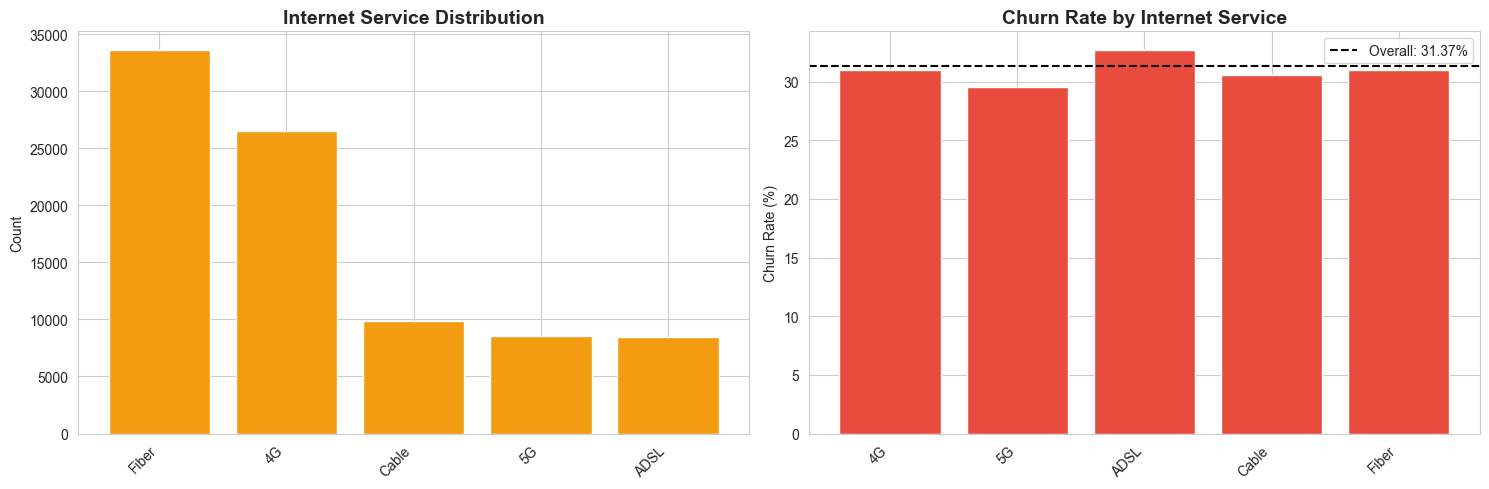


Internet Service Churn Rates:
internet_service
ADSL     32.649452
Fiber    30.999344
4G       30.984429
Cable    30.597771
5G       29.507624
Name: churned, dtype: float64


In [13]:
# Internet service analysis
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Internet service distribution
internet_counts = df['internet_service'].value_counts()
axes[0].bar(range(len(internet_counts)), internet_counts.values, color='#f39c12')
axes[0].set_title('Internet Service Distribution', fontsize=14, fontweight='bold')
axes[0].set_xticks(range(len(internet_counts)))
axes[0].set_xticklabels(internet_counts.index, rotation=45, ha='right')
axes[0].set_ylabel('Count')

# Churn rate by internet service
internet_churn = df.groupby('internet_service')['churned'].mean() * 100
axes[1].bar(range(len(internet_churn)), internet_churn.values, color='#e74c3c')
axes[1].set_title('Churn Rate by Internet Service', fontsize=14, fontweight='bold')
axes[1].set_xticks(range(len(internet_churn)))
axes[1].set_xticklabels(internet_churn.index, rotation=45, ha='right')
axes[1].set_ylabel('Churn Rate (%)')
axes[1].axhline(churn_rate, color='black', linestyle='--', label=f"Overall: {churn_rate:.2f}%")
axes[1].legend()

plt.tight_layout()
plt.show()

print("\nInternet Service Churn Rates:")
print(internet_churn.sort_values(ascending=False))

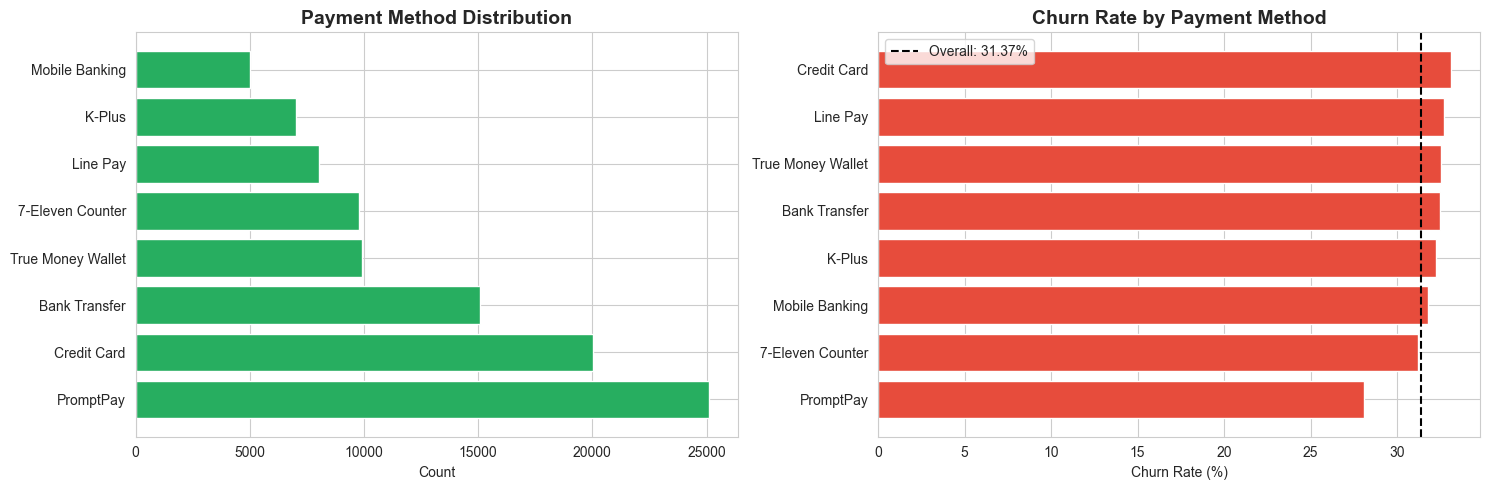


Payment Method Churn Rates:
payment_method
Credit Card          33.135297
Line Pay             32.710746
True Money Wallet    32.564696
Bank Transfer        32.490376
K-Plus               32.272727
Mobile Banking       31.762827
7-Eleven Counter     31.219363
PromptPay            28.110434
Name: churned, dtype: float64


In [14]:
# Payment method analysis
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Payment method distribution
payment_counts = df['payment_method'].value_counts()
axes[0].barh(range(len(payment_counts)), payment_counts.values, color='#27ae60')
axes[0].set_title('Payment Method Distribution', fontsize=14, fontweight='bold')
axes[0].set_yticks(range(len(payment_counts)))
axes[0].set_yticklabels(payment_counts.index)
axes[0].set_xlabel('Count')

# Churn rate by payment method
payment_churn = df.groupby('payment_method')['churned'].mean() * 100
payment_churn = payment_churn.sort_values(ascending=True)
axes[1].barh(range(len(payment_churn)), payment_churn.values, color='#e74c3c')
axes[1].set_title('Churn Rate by Payment Method', fontsize=14, fontweight='bold')
axes[1].set_yticks(range(len(payment_churn)))
axes[1].set_yticklabels(payment_churn.index)
axes[1].set_xlabel('Churn Rate (%)')
axes[1].axvline(churn_rate, color='black', linestyle='--', label=f"Overall: {churn_rate:.2f}%")
axes[1].legend()

plt.tight_layout()
plt.show()

print("\nPayment Method Churn Rates:")
print(payment_churn.sort_values(ascending=False))

## 6. Tenure Analysis

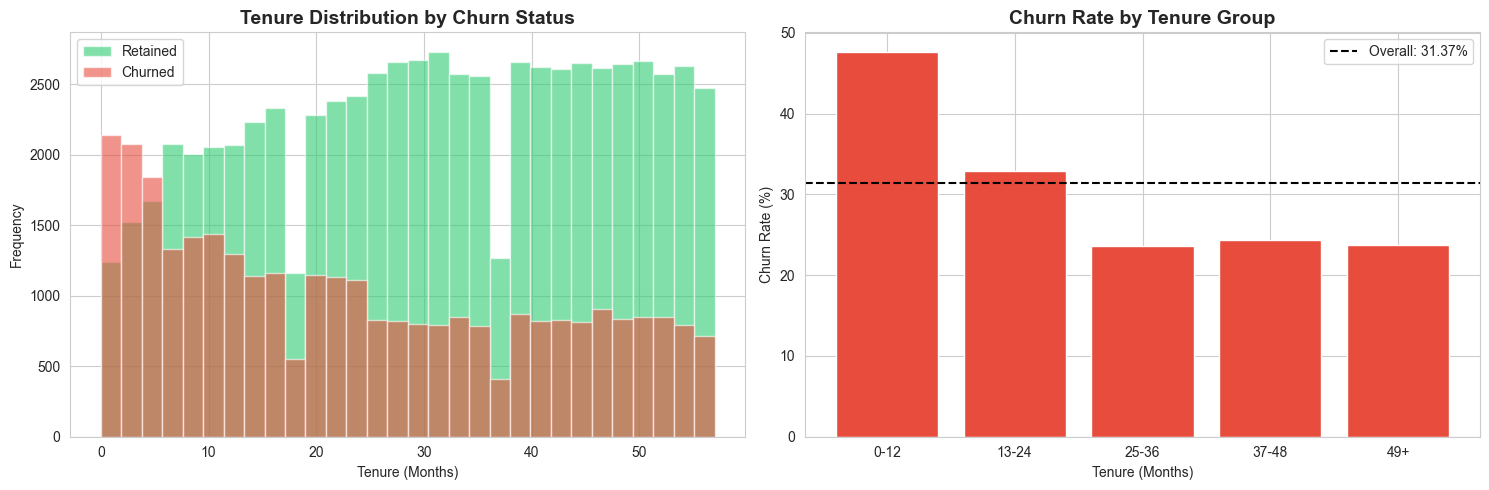


Tenure Group Churn Rates:
tenure_group
0-12     47.664314
13-24    32.872289
25-36    23.610573
37-48    24.356882
49+      23.714379
Name: churned, dtype: float64

Average Tenure - Retained: 30.6 months
Average Tenure - Churned: 23.6 months


In [15]:
# Tenure analysis
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Tenure distribution by churn
df[df['churned']==0]['tenure_months'].hist(bins=30, ax=axes[0], alpha=0.6, label='Retained', color='#2ecc71')
df[df['churned']==1]['tenure_months'].hist(bins=30, ax=axes[0], alpha=0.6, label='Churned', color='#e74c3c')
axes[0].set_title('Tenure Distribution by Churn Status', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Tenure (Months)')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Churn rate by tenure groups
df['tenure_group'] = pd.cut(df['tenure_months'], bins=[0, 12, 24, 36, 48, 100], 
                             labels=['0-12', '13-24', '25-36', '37-48', '49+'])
tenure_churn = df.groupby('tenure_group')['churned'].mean() * 100
axes[1].bar(range(len(tenure_churn)), tenure_churn.values, color='#e74c3c')
axes[1].set_title('Churn Rate by Tenure Group', fontsize=14, fontweight='bold')
axes[1].set_xticks(range(len(tenure_churn)))
axes[1].set_xticklabels(tenure_churn.index)
axes[1].set_xlabel('Tenure (Months)')
axes[1].set_ylabel('Churn Rate (%)')
axes[1].axhline(churn_rate, color='black', linestyle='--', label=f"Overall: {churn_rate:.2f}%")
axes[1].legend()

plt.tight_layout()
plt.show()

print("\nTenure Group Churn Rates:")
print(tenure_churn)
print(f"\nAverage Tenure - Retained: {df[df['churned']==0]['tenure_months'].mean():.1f} months")
print(f"Average Tenure - Churned: {df[df['churned']==1]['tenure_months'].mean():.1f} months")

## 7. Financial Features Analysis

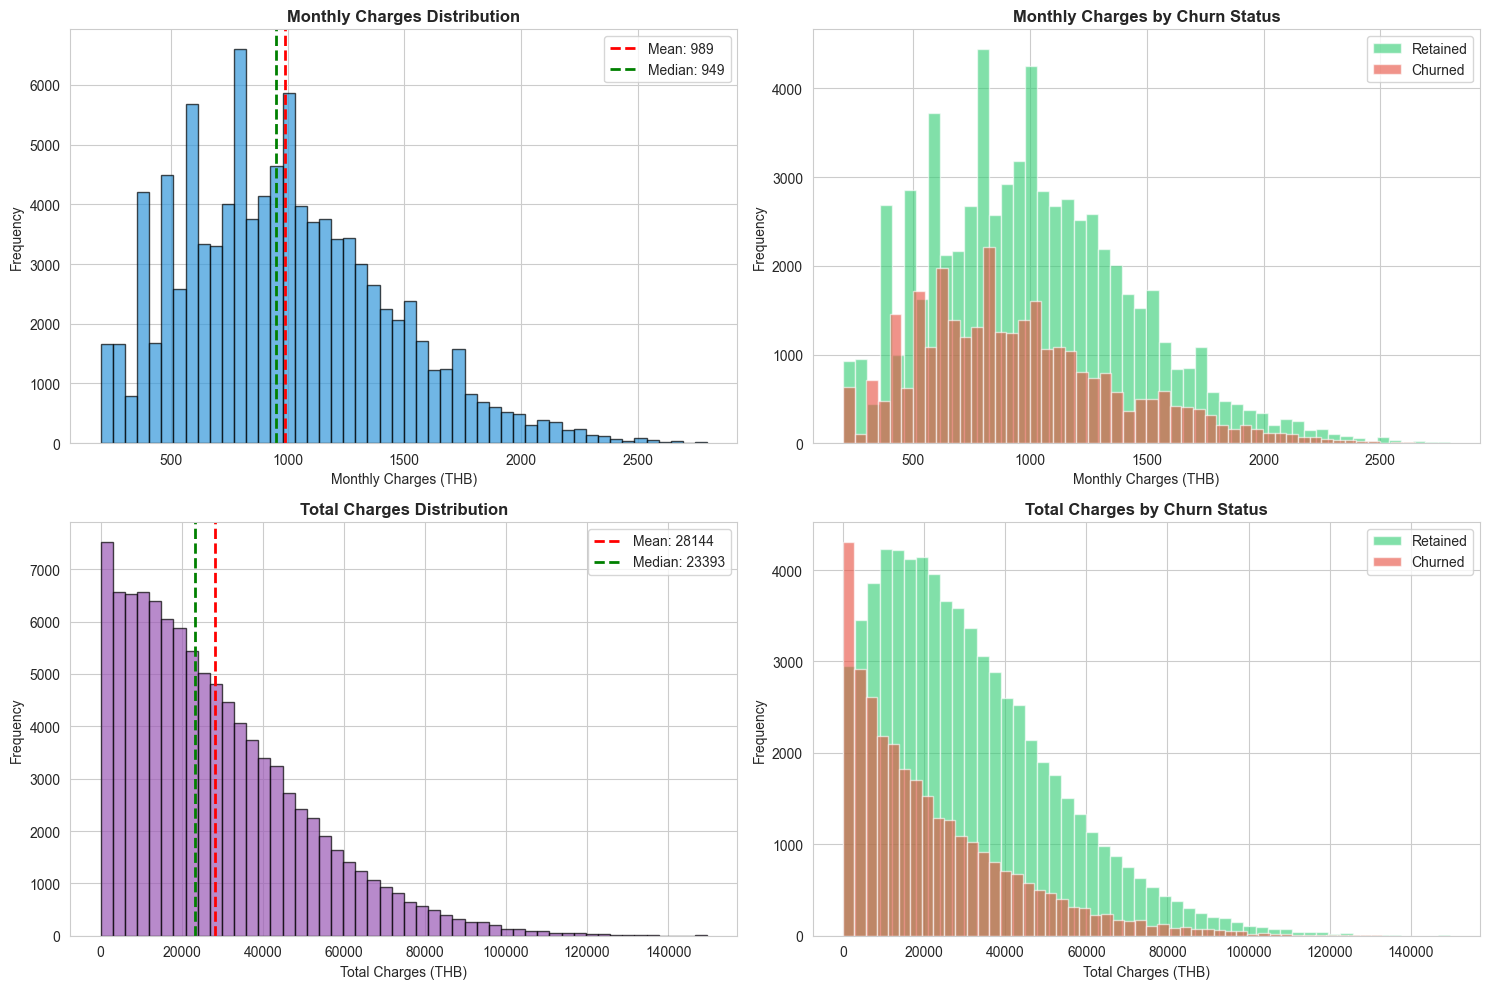


Financial Statistics:
Monthly Charges:
  - Mean (All): 988.99 THB
  - Median (All): 949.00 THB
  - Mean (Retained): 1010.12 THB
  - Median (Retained): 989.00 THB
  - Mean (Churned): 942.74 THB
  - Median (Churned): 890.00 THB

Total Charges:
  - Mean (All): 28143.99 THB
  - Median (All): 23393.42 THB
  - Mean (Retained): 30884.06 THB
  - Median (Retained): 26701.54 THB
  - Mean (Churned): 22149.10 THB
  - Median (Churned): 16147.94 THB

Skewness (Right-skewed distributions):
  - Monthly Charges Skewness: 0.62
  - Total Charges Skewness: 1.08

Note: Positive skewness indicates right-skewed distribution (mean > median)


In [16]:
# Monthly charges analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Monthly charges distribution
axes[0, 0].hist(df['monthly_charges_thb'], bins=50, color='#3498db', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Monthly Charges Distribution', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Monthly Charges (THB)')
axes[0, 0].set_ylabel('Frequency')
# Add mean, median, and mode
monthly_mean = df['monthly_charges_thb'].mean()
monthly_median = df['monthly_charges_thb'].median()
axes[0, 0].axvline(monthly_mean, color='red', linestyle='--', linewidth=2, label=f"Mean: {monthly_mean:.0f}")
axes[0, 0].axvline(monthly_median, color='green', linestyle='--', linewidth=2, label=f"Median: {monthly_median:.0f}")
axes[0, 0].legend()

# Monthly charges by churn
df[df['churned']==0]['monthly_charges_thb'].hist(bins=50, ax=axes[0, 1], alpha=0.6, label='Retained', color='#2ecc71')
df[df['churned']==1]['monthly_charges_thb'].hist(bins=50, ax=axes[0, 1], alpha=0.6, label='Churned', color='#e74c3c')
axes[0, 1].set_title('Monthly Charges by Churn Status', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Monthly Charges (THB)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()

# Total charges distribution
axes[1, 0].hist(df['total_charges_thb'], bins=50, color='#9b59b6', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Total Charges Distribution', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Total Charges (THB)')
axes[1, 0].set_ylabel('Frequency')
# Add mean, median, and mode
total_mean = df['total_charges_thb'].mean()
total_median = df['total_charges_thb'].median()
axes[1, 0].axvline(total_mean, color='red', linestyle='--', linewidth=2, label=f"Mean: {total_mean:.0f}")
axes[1, 0].axvline(total_median, color='green', linestyle='--', linewidth=2, label=f"Median: {total_median:.0f}")
axes[1, 0].legend()

# Total charges by churn
df[df['churned']==0]['total_charges_thb'].hist(bins=50, ax=axes[1, 1], alpha=0.6, label='Retained', color='#2ecc71')
df[df['churned']==1]['total_charges_thb'].hist(bins=50, ax=axes[1, 1], alpha=0.6, label='Churned', color='#e74c3c')
axes[1, 1].set_title('Total Charges by Churn Status', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Total Charges (THB)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

print("\nFinancial Statistics:")
print(f"Monthly Charges:")
print(f"  - Mean (All): {monthly_mean:.2f} THB")
print(f"  - Median (All): {monthly_median:.2f} THB")
print(f"  - Mean (Retained): {df[df['churned']==0]['monthly_charges_thb'].mean():.2f} THB")
print(f"  - Median (Retained): {df[df['churned']==0]['monthly_charges_thb'].median():.2f} THB")
print(f"  - Mean (Churned): {df[df['churned']==1]['monthly_charges_thb'].mean():.2f} THB")
print(f"  - Median (Churned): {df[df['churned']==1]['monthly_charges_thb'].median():.2f} THB")

print(f"\nTotal Charges:")
print(f"  - Mean (All): {total_mean:.2f} THB")
print(f"  - Median (All): {total_median:.2f} THB")
print(f"  - Mean (Retained): {df[df['churned']==0]['total_charges_thb'].mean():.2f} THB")
print(f"  - Median (Retained): {df[df['churned']==0]['total_charges_thb'].median():.2f} THB")
print(f"  - Mean (Churned): {df[df['churned']==1]['total_charges_thb'].mean():.2f} THB")
print(f"  - Median (Churned): {df[df['churned']==1]['total_charges_thb'].median():.2f} THB")

print(f"\nSkewness (Right-skewed distributions):")
print(f"  - Monthly Charges Skewness: {df['monthly_charges_thb'].skew():.2f}")
print(f"  - Total Charges Skewness: {df['total_charges_thb'].skew():.2f}")
print(f"\nNote: Positive skewness indicates right-skewed distribution (mean > median)")

## 8. Customer Behavior Features

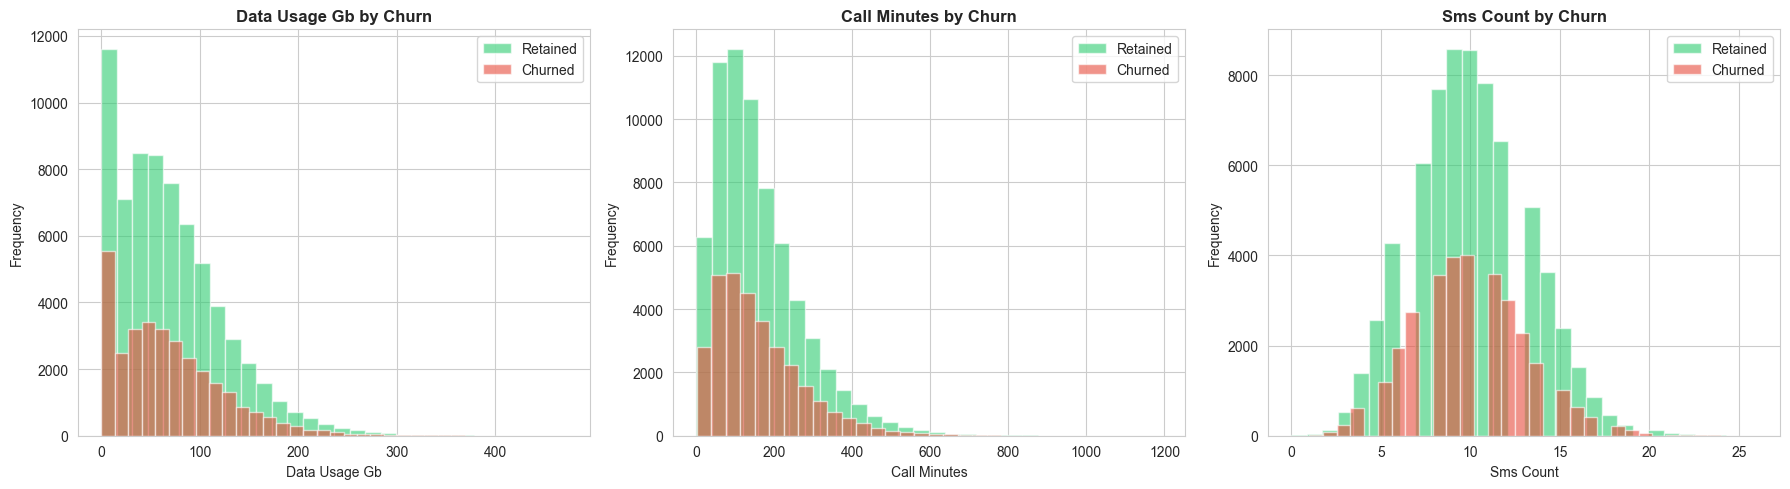


Usage Statistics by Churn Status:

Data Usage Gb:
  Retained: 69.37
  Churned: 68.04

Call Minutes:
  Retained: 159.47
  Churned: 159.74

Sms Count:
  Retained: 10.01
  Churned: 9.99


In [17]:
# Usage metrics analysis
usage_features = ['data_usage_gb', 'call_minutes', 'sms_count']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, feature in enumerate(usage_features):
    df[df['churned']==0][feature].hist(bins=30, ax=axes[idx], alpha=0.6, label='Retained', color='#2ecc71')
    df[df['churned']==1][feature].hist(bins=30, ax=axes[idx], alpha=0.6, label='Churned', color='#e74c3c')
    axes[idx].set_title(f"{feature.replace('_', ' ').title()} by Churn", fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(feature.replace('_', ' ').title())
    axes[idx].set_ylabel('Frequency')
    axes[idx].legend()

plt.tight_layout()
plt.show()

print("\nUsage Statistics by Churn Status:")
for feature in usage_features:
    print(f"\n{feature.replace('_', ' ').title()}:")
    print(f"  Retained: {df[df['churned']==0][feature].mean():.2f}")
    print(f"  Churned: {df[df['churned']==1][feature].mean():.2f}")

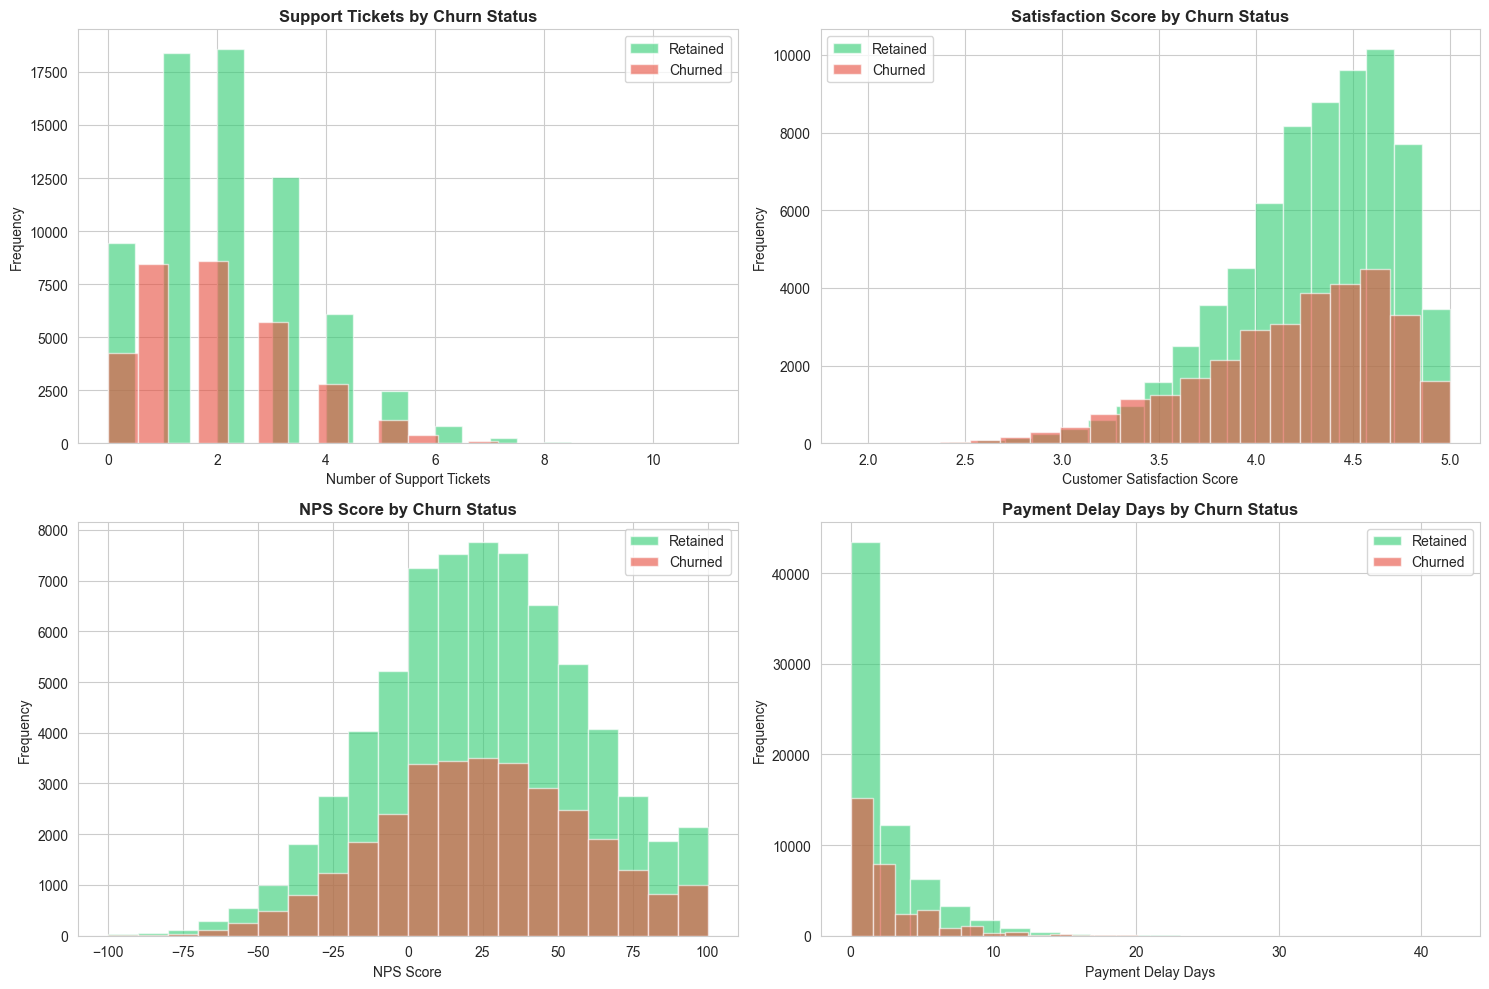


Customer Experience Metrics:
Support Tickets - Retained: 2.00
Support Tickets - Churned: 2.00

Satisfaction Score - Retained: 4.30
Satisfaction Score - Churned: 4.20

NPS Score - Retained: 24.34
NPS Score - Churned: 24.41


In [18]:
# Support and satisfaction analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Number of support tickets
df[df['churned']==0]['num_support_tickets'].hist(bins=20, ax=axes[0, 0], alpha=0.6, label='Retained', color='#2ecc71')
df[df['churned']==1]['num_support_tickets'].hist(bins=20, ax=axes[0, 0], alpha=0.6, label='Churned', color='#e74c3c')
axes[0, 0].set_title('Support Tickets by Churn Status', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Number of Support Tickets')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()

# Customer satisfaction score
df[df['churned']==0]['customer_satisfaction_score'].hist(bins=20, ax=axes[0, 1], alpha=0.6, label='Retained', color='#2ecc71')
df[df['churned']==1]['customer_satisfaction_score'].hist(bins=20, ax=axes[0, 1], alpha=0.6, label='Churned', color='#e74c3c')
axes[0, 1].set_title('Satisfaction Score by Churn Status', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Customer Satisfaction Score')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()

# NPS score
df[df['churned']==0]['nps_score'].hist(bins=20, ax=axes[1, 0], alpha=0.6, label='Retained', color='#2ecc71')
df[df['churned']==1]['nps_score'].hist(bins=20, ax=axes[1, 0], alpha=0.6, label='Churned', color='#e74c3c')
axes[1, 0].set_title('NPS Score by Churn Status', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('NPS Score')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()

# Payment delay days
df[df['churned']==0]['payment_delay_days'].hist(bins=20, ax=axes[1, 1], alpha=0.6, label='Retained', color='#2ecc71')
df[df['churned']==1]['payment_delay_days'].hist(bins=20, ax=axes[1, 1], alpha=0.6, label='Churned', color='#e74c3c')
axes[1, 1].set_title('Payment Delay Days by Churn Status', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Payment Delay Days')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

print("\nCustomer Experience Metrics:")
print(f"Support Tickets - Retained: {df[df['churned']==0]['num_support_tickets'].mean():.2f}")
print(f"Support Tickets - Churned: {df[df['churned']==1]['num_support_tickets'].mean():.2f}")
print(f"\nSatisfaction Score - Retained: {df[df['churned']==0]['customer_satisfaction_score'].mean():.2f}")
print(f"Satisfaction Score - Churned: {df[df['churned']==1]['customer_satisfaction_score'].mean():.2f}")
print(f"\nNPS Score - Retained: {df[df['churned']==0]['nps_score'].mean():.2f}")
print(f"NPS Score - Churned: {df[df['churned']==1]['nps_score'].mean():.2f}")

## 9. Correlation Analysis

FEATURE IMPORTANCE ANALYSIS - Association with Churn

Top 20 Features Most Associated with Churn:
Rank  Feature                             Correlation  Type           
----------------------------------------------------------------------
1     contract_type                       0.2394       Categorical    
2     days_to_contract_end                0.2015       Numerical      
3     tenure_months                       0.1948       Numerical      
4     total_charges_thb                   0.1850       Numerical      
5     customer_satisfaction_score         0.1039       Numerical      
6     multiple_lines                      0.0800       Numerical      
7     monthly_charges_thb                 0.0721       Numerical      
8     price_increase_6months_thb          0.0719       Numerical      
9     discount_amount_thb                 0.0669       Numerical      
10    tech_support                        0.0655       Categorical    
11    online_security                     0.0493  

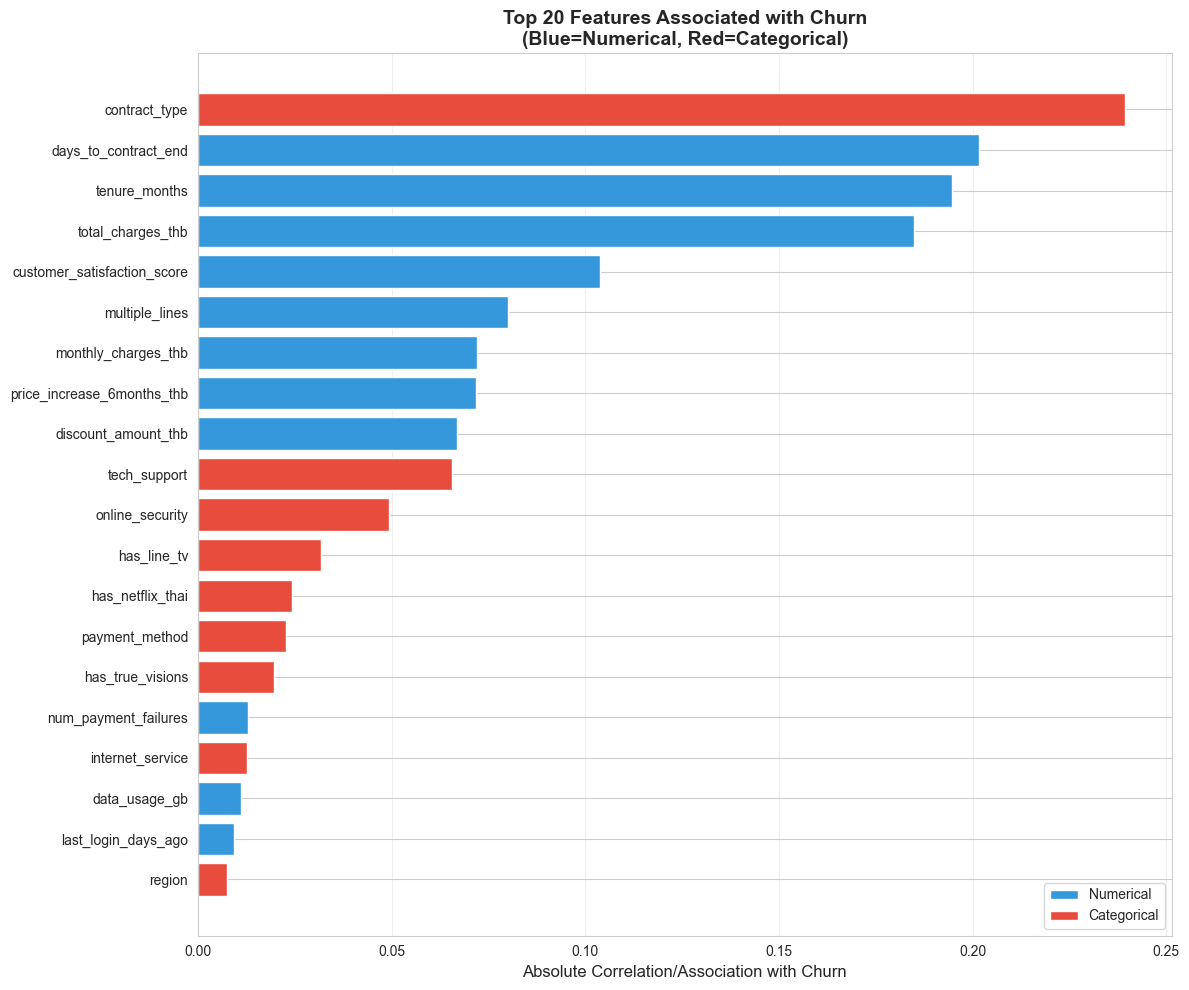


KEY FINDINGS:
Total features analyzed: 45
  - Numerical: 27
  - Categorical: 18

Top 3 Predictors:
  1. contract_type (Categorical): 0.2394
  2. days_to_contract_end (Numerical): 0.2015
  3. tenure_months (Numerical): 0.1948


In [19]:
# COMPREHENSIVE CORRELATION ANALYSIS - Numerical + Categorical Features
print("="*80)
print("FEATURE IMPORTANCE ANALYSIS - Association with Churn")
print("="*80)

from sklearn.preprocessing import LabelEncoder

# Create a copy for encoding
df_encoded = df.copy()

# 1. Get numerical correlations
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in ['customer_id', 'postcode']]

numerical_corr = df[numerical_cols].corr()['churned'].drop('churned').abs().sort_values(ascending=False)

# 2. Encode categorical features and calculate correlation
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
exclude_cols = ['customer_id', 'full_name_thai', 'account_created_date', 'churn_date', 
                'churn_reason', 'competitor_switched_to', 'province']
categorical_cols = [col for col in categorical_cols if col not in exclude_cols]

categorical_corr = {}
le = LabelEncoder()

for col in categorical_cols:
    # Encode categorical variable
    df_encoded[col + '_encoded'] = le.fit_transform(df[col].astype(str))
    # Calculate correlation with churn
    corr_val = abs(df_encoded[[col + '_encoded', 'churned']].corr().iloc[0, 1])
    categorical_corr[col] = corr_val

# 3. Combine all features
all_features = {}
for feat, corr in numerical_corr.items():
    all_features[feat] = {'correlation': corr, 'type': 'Numerical'}
for feat, corr in categorical_corr.items():
    all_features[feat] = {'correlation': corr, 'type': 'Categorical'}

# Sort by correlation
sorted_features = sorted(all_features.items(), key=lambda x: x[1]['correlation'], reverse=True)

# Display top 20
print("\nTop 20 Features Most Associated with Churn:")
print(f"{'Rank':<5} {'Feature':<35} {'Correlation':<12} {'Type':<15}")
print("-" * 70)
for i, (feat, info) in enumerate(sorted_features[:20], 1):
    print(f"{i:<5} {feat:<35} {info['correlation']:.4f}       {info['type']:<15}")

# Visualize top features
top_n = 20
top_features_list = [f[0] for f in sorted_features[:top_n]]
top_correlations = [f[1]['correlation'] for f in sorted_features[:top_n]]
top_types = [f[1]['type'] for f in sorted_features[:top_n]]

# Color by type
colors = ['#3498db' if t == 'Numerical' else '#e74c3c' for t in top_types]

fig, ax = plt.subplots(figsize=(12, 10))
y_pos = np.arange(len(top_features_list))
ax.barh(y_pos, top_correlations, color=colors)
ax.set_yticks(y_pos)
ax.set_yticklabels(top_features_list)
ax.invert_yaxis()
ax.set_xlabel('Absolute Correlation/Association with Churn', fontsize=12)
ax.set_title('Top 20 Features Associated with Churn\n(Blue=Numerical, Red=Categorical)', 
             fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#3498db', label='Numerical'),
                   Patch(facecolor='#e74c3c', label='Categorical')]
ax.legend(handles=legend_elements, loc='lower right')

plt.tight_layout()
plt.show()

print(f"\n{'='*80}")
print(f"KEY FINDINGS:")
print(f"{'='*80}")
print(f"Total features analyzed: {len(all_features)}")
print(f"  - Numerical: {len(numerical_corr)}")
print(f"  - Categorical: {len(categorical_corr)}")
print(f"\nTop 3 Predictors:")
for i, (feat, info) in enumerate(sorted_features[:3], 1):
    print(f"  {i}. {feat} ({info['type']}): {info['correlation']:.4f}")

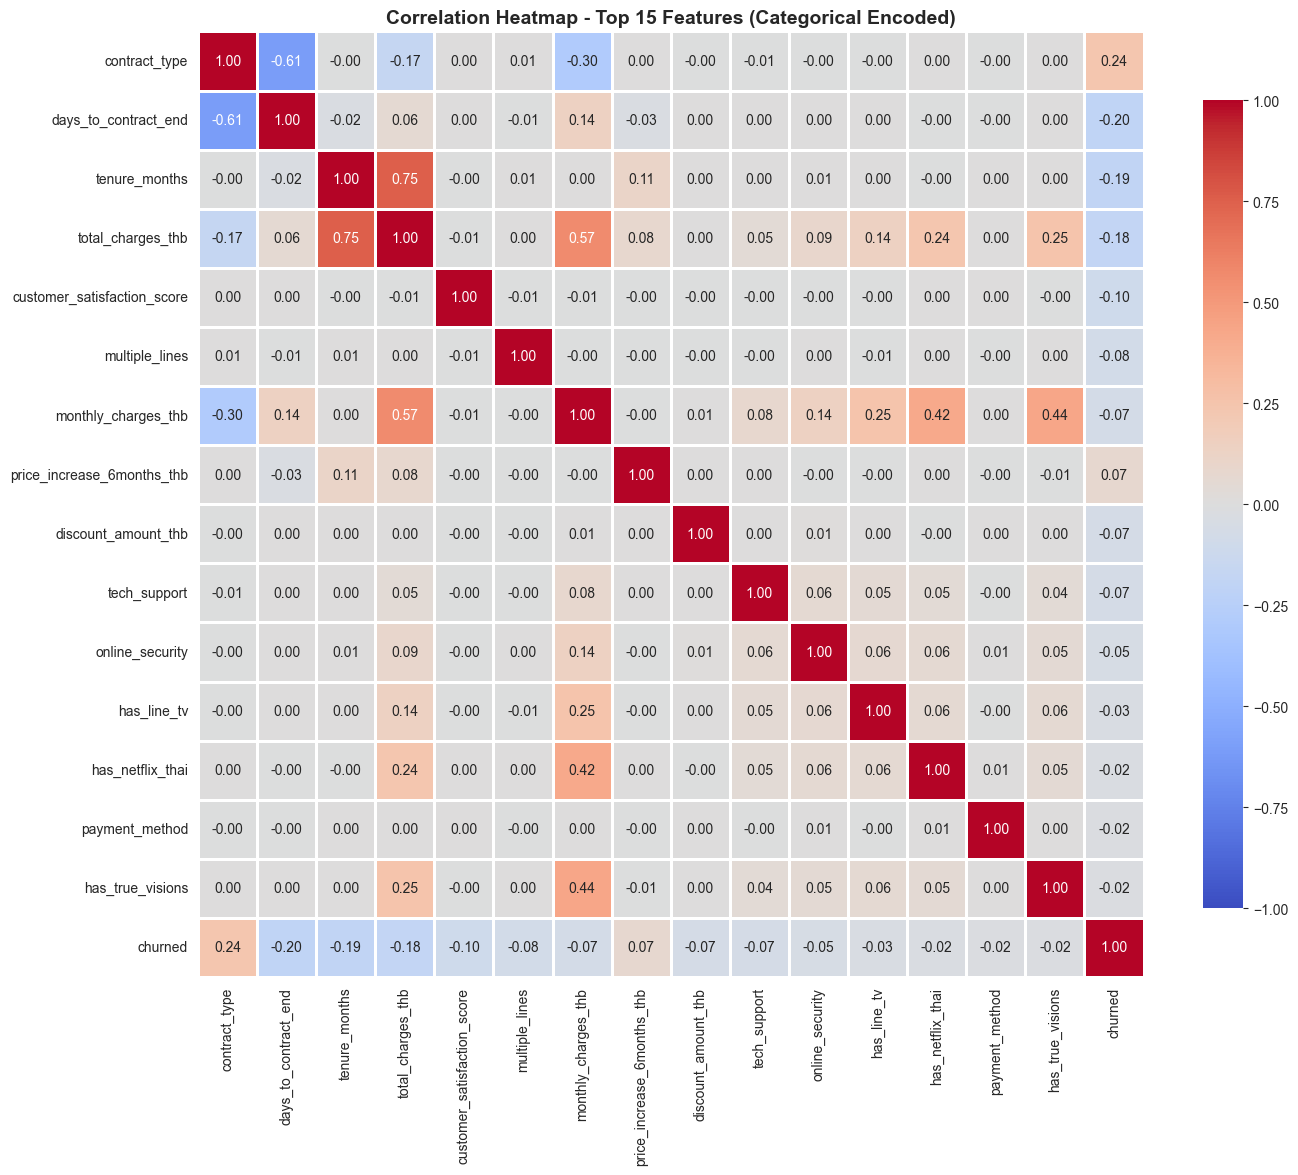


Note: Categorical features are label-encoded for correlation calculation.
This provides an approximation of their relationship with churn and other features.


In [20]:
# Correlation heatmap for top features (using encoded categorical features)
top_n_heatmap = 15
top_features_for_heatmap = [f[0] for f in sorted_features[:top_n_heatmap]]

# Prepare data for heatmap - use encoded versions for categorical
heatmap_cols = []
for feat in top_features_for_heatmap:
    if feat in categorical_cols:
        heatmap_cols.append(feat + '_encoded')
    else:
        heatmap_cols.append(feat)

heatmap_cols.append('churned')

# Create correlation matrix
corr_matrix = df_encoded[heatmap_cols].corr()

# Rename columns back to original names for display
rename_dict = {col + '_encoded': col for col in categorical_cols if col + '_encoded' in heatmap_cols}
corr_matrix = corr_matrix.rename(columns=rename_dict, index=rename_dict)

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, vmin=-1, vmax=1)
plt.title('Correlation Heatmap - Top 15 Features (Categorical Encoded)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nNote: Categorical features are label-encoded for correlation calculation.")
print("This provides an approximation of their relationship with churn and other features.")

## 10. Key Insights Summary

In [21]:
# Generate comprehensive insights
print("="*80)
print("KEY INSIGHTS FROM EDA")
print("="*80)

print("\n1. CHURN OVERVIEW:")
print(f"   - Overall churn rate: {churn_rate:.2f}%")
print(f"   - Total customers: {len(df):,}")
print(f"   - Churned customers: {df['churned'].sum():,}")
print(f"   - Retained customers: {(df['churned']==0).sum():,}")

print("\n2. HIGH-RISK SEGMENTS:")
print("   - Contract types with highest churn:")
print(f"     {contract_churn.sort_values(ascending=False).head(3).to_string()}")
print("\n   - Internet services with highest churn:")
print(f"     {internet_churn.sort_values(ascending=False).head(3).to_string()}")

print("\n3. CUSTOMER EXPERIENCE INDICATORS:")
avg_csat_retained = df[df['churned']==0]['customer_satisfaction_score'].mean()
avg_csat_churned = df[df['churned']==1]['customer_satisfaction_score'].mean()
avg_nps_retained = df[df['churned']==0]['nps_score'].mean()
avg_nps_churned = df[df['churned']==1]['nps_score'].mean()
print(f"   - Satisfaction Score (Retained vs Churned): {avg_csat_retained:.2f} vs {avg_csat_churned:.2f}")
print(f"   - NPS Score (Retained vs Churned): {avg_nps_retained:.2f} vs {avg_nps_churned:.2f}")

print("\n4. TENURE INSIGHTS:")
avg_tenure_retained = df[df['churned']==0]['tenure_months'].mean()
avg_tenure_churned = df[df['churned']==1]['tenure_months'].mean()
print(f"   - Average tenure (Retained): {avg_tenure_retained:.1f} months")
print(f"   - Average tenure (Churned): {avg_tenure_churned:.1f} months")
print(f"   - Highest churn in tenure group: {tenure_churn.idxmax()} months ({tenure_churn.max():.2f}%)")

print("\n5. FINANCIAL INSIGHTS:")
avg_monthly_retained = df[df['churned']==0]['monthly_charges_thb'].mean()
avg_monthly_churned = df[df['churned']==1]['monthly_charges_thb'].mean()
print(f"   - Avg monthly charges (Retained): {avg_monthly_retained:.2f} THB")
print(f"   - Avg monthly charges (Churned): {avg_monthly_churned:.2f} THB")
print(f"   - Difference: {abs(avg_monthly_churned - avg_monthly_retained):.2f} THB")

print("\n" + "="*80)

KEY INSIGHTS FROM EDA

1. CHURN OVERVIEW:
   - Overall churn rate: 31.37%
   - Total customers: 100,000
   - Churned customers: 31,369
   - Retained customers: 68,631

2. HIGH-RISK SEGMENTS:
   - Contract types with highest churn:
     contract_type
Prepaid             40.391784
Postpaid Monthly    36.043484
1 Year              12.666977

   - Internet services with highest churn:
     internet_service
ADSL     32.649452
Fiber    30.999344
4G       30.984429

3. CUSTOMER EXPERIENCE INDICATORS:
   - Satisfaction Score (Retained vs Churned): 4.30 vs 4.20
   - NPS Score (Retained vs Churned): 24.34 vs 24.41

4. TENURE INSIGHTS:
   - Average tenure (Retained): 30.6 months
   - Average tenure (Churned): 23.6 months
   - Highest churn in tenure group: 0-12 months (47.66%)

5. FINANCIAL INSIGHTS:
   - Avg monthly charges (Retained): 1010.12 THB
   - Avg monthly charges (Churned): 942.74 THB
   - Difference: 67.39 THB

